# Projet MNIST - Classification de Chiffres Manuscrits avec Deep Learning

## Introduction

### Objectif
L'objectif de ce projet est de développer un classifieur supervisé en utilisant des techniques de Deep Learning pour classifier les images du dataset MNIST. Les étapes principales incluent :
- Chargement du dataset MNIST
- Prétraitement des données
- Construction et entraînement d'un modèle de réseau de neurones
- Évaluation du modèle sur les données de test
- Visualisation des résultats

## Chargement et Prétraitement des Données

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

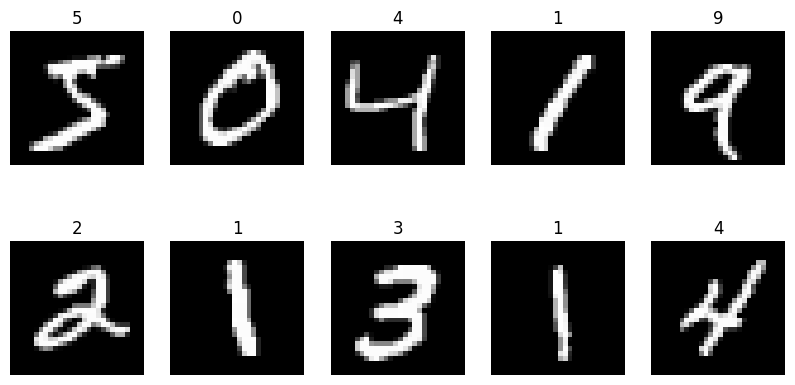

In [34]:
# Charger le dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Redimensionner les données pour les adapter à l'entrée du CNN
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Convertir les labels en one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Visualiser quelques exemples du dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(np.argmax(y_train[i]))
    plt.axis('off')
plt.show()

In [35]:
# Utiliser ImageDataGenerator pour augmenter les données
train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_generator = test_datagen.flow(X_test, y_test, batch_size=32)

## Construction du Modèle

### Explication

Nous allons construire un modèle de réseau de neurones CNN (Convolutional Neural Network) pour classer les images du dataset MNIST.

In [36]:
# Construire le modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()

# Ajouter EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Entraînement du Modèle

### Explication

Nous allons entraîner le modèle sur les données d'entraînement avec une validation croisée sur 20% des données. Le modèle sera entraîné pendant 25 époques avec une taille de batch de 32.


In [40]:
# Entraîner le modèle avec fit
history = model.fit(
    train_generator,
    steps_per_epoch=2000,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=1000,
    callbacks=[early_stopping]
)

Epoch 1/25
1871/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9642 - loss: 0.1187

c:\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9644 - loss: 0.1177 - val_accuracy: 0.9874 - val_loss: 0.0354
Epoch 2/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9771 - loss: 0.0726 - val_accuracy: 0.9902 - val_loss: 0.0295
Epoch 3/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9814 - loss: 0.0602 - val_accuracy: 0.9913 - val_loss: 0.0284
Epoch 4/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9838 - loss: 0.0509 - val_accuracy: 0.9893 - val_loss: 0.0371
Epoch 5/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9847 - loss: 0.0466 - val_accuracy: 0.9913 - val_loss: 0.0282
Epoch 6/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9869 - loss: 0.0408 - val_accuracy: 0.9925 - val_loss: 0.0220
Epoch 7/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9884 - loss: 0.0358 - val_accuracy: 0.9937 - val_loss: 0.0226
Epoch 8/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9896 - loss: 0.0331 - val_accurac

## Évaluation du Modèle

### Explication

Nous allons évaluer les performances du modèle sur les données de test et afficher la précision obtenue.


In [41]:
# Évaluer le modèle
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9931 - loss: 0.0216
Test Accuracy: 99.45%


## Matrice de Confusion

### Explication

Nous allons générer une matrice de confusion pour visualiser les performances du modèle sur les données de test.


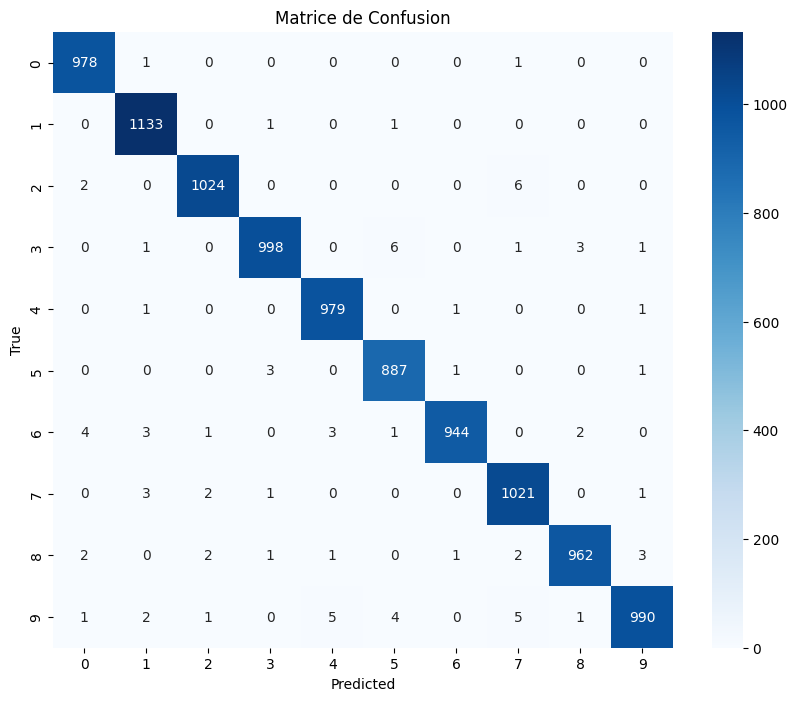

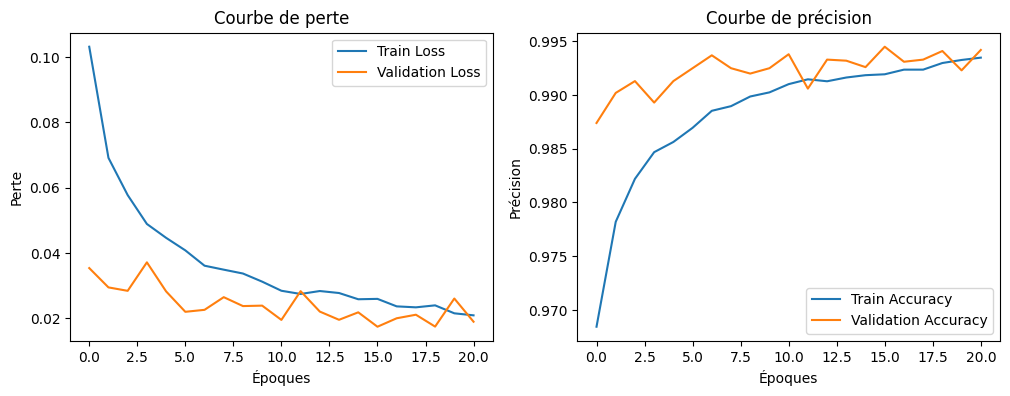

In [42]:
# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice de Confusion')
plt.show()

# Afficher les courbes de perte et de précision
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

plt.show()

# 10 images premiere confusion du model

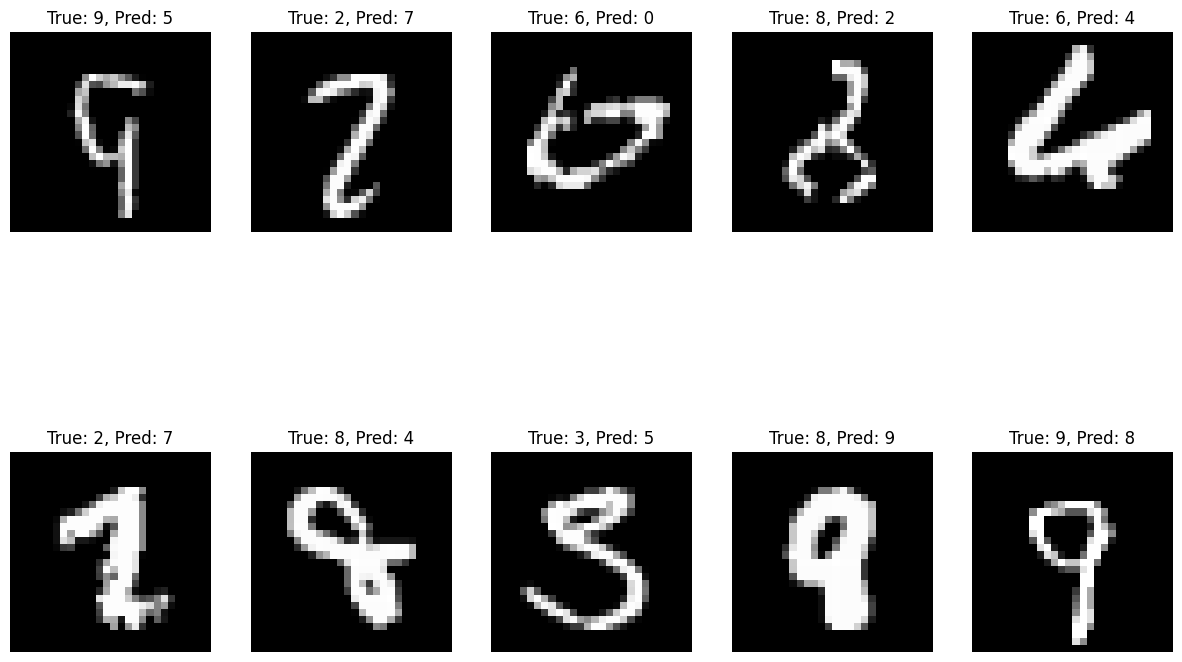

In [43]:
# Identifier les indices des images mal classées
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Afficher les 10 premières images mal classées
plt.figure(figsize=(15, 10))
for i, index in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[index]}, Pred: {y_pred_classes[index]}")
    plt.axis('off')
plt.show()